# Polynomial Regression Assignment (Please do not remove the output cells)

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  


## Enter your IDs and Names below

1- Omar Usama Mahmoud 46-10418 T-4
  
2- Hussein Youssef 46-4640 T-2


### Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


### 1- Read the data

In [2]:
df_air=pd.read_csv('AirQualityUCI.csv')
df_air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


### 2- Drop unwanted labels

In [3]:
col_drop=['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)']
df_drop=df_air.drop(col_drop,axis=1)
df_drop

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


### 3- Handle missing data

In [4]:
df_drop.isnull().sum()

Date                0
Time                0
PT08.S1(CO)       366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [65]:
df_drop['NO2(GT)'].unique()


array([113.,  92., 114., 122., 116.,  96.,  77.,  76.,  60.,  nan,  34.,
        28.,  48.,  82., 112., 101.,  98.,  95., 128., 126., 131., 135.,
       151., 172., 165., 136.,  85.,  53.,  97., 110.,  91.,  32.,  44.,
        71., 104., 141., 143., 123., 120., 119., 149., 145., 170., 139.,
       134.,  83.,  65., 158., 161., 124., 102., 125., 148., 159., 130.,
       129.,  70.,  63.,  67.,  84., 107., 121., 157., 173., 146.,  99.,
        93.,  88.,  74.,  80.,  89., 155., 111., 162., 187., 103.,  61.,
        59.,  52.,  64., 150., 154., 133., 137., 177., 138., 117.,  90.,
        79.,  40., 108., 127., 142., 153., 194., 182., 180.,  78.,  57.,
       152., 169., 156., 168., 176., 106., 166., 147., 144., 109.,  81.,
        55., 105.,  87.,  94.,  66.,  36.,  62.,  86.,  33.,  27.,  23.,
        46., 115.,  72.,  31.,  22.,  47., 132., 100.,  54.,  75.,  58.,
        20.,  51.,  73.,  69.,  38.,  26., 118.,  49.,  50., 164.,  39.,
        35.,  30.,  19., 171.,  68.,  25.,  56.,  2

In [4]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

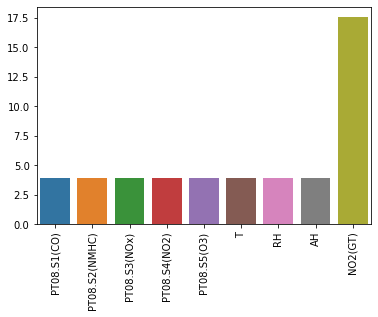

In [6]:
percent_nan = percent_missing(df_drop)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);


In [5]:
cond=df_drop[df_drop['NO2(GT)'].isna()].index
df_drop_label_na=df_drop.drop(cond)
df_drop_label_na


,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


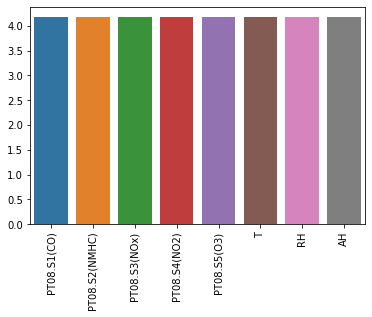

In [66]:
percent_nan = percent_missing(df_drop_label_na)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [11]:
df_drop_label_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7715 non-null   object 
 1   Time           7715 non-null   object 
 2   PT08.S1(CO)    7393 non-null   float64
 3   PT08.S2(NMHC)  7393 non-null   float64
 4   PT08.S3(NOx)   7393 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   7393 non-null   float64
 7   PT08.S5(O3)    7393 non-null   float64
 8   T              7393 non-null   float64
 9   RH             7393 non-null   float64
 10  AH             7393 non-null   float64
dtypes: float64(9), object(2)
memory usage: 723.3+ KB


In [67]:
df_drop_label_na['PT08.S1(CO)']=df_drop_label_na.groupby('Date')['PT08.S1(CO)'].transform(lambda val: val.fillna(val.mean()))
df_drop_label_na['PT08.S2(NMHC)']=df_drop_label_na.groupby('Date')['PT08.S2(NMHC)'].transform(lambda val: val.fillna(val.mean()))
df_drop_label_na['PT08.S3(NOx)']=df_drop_label_na.groupby('Date')['PT08.S3(NOx)'].transform(lambda val: val.fillna(val.mean()))
df_drop_label_na['PT08.S4(NO2)']=df_drop_label_na.groupby('Date')['PT08.S4(NO2)'].transform(lambda val: val.fillna(val.mean()))
df_drop_label_na['PT08.S5(O3)']=df_drop_label_na.groupby('Date')['PT08.S5(O3)'].transform(lambda val: val.fillna(val.mean()))
df_drop_label_na['T']=df_drop_label_na.groupby('Date')['T'].transform(lambda val: val.fillna(val.mean()))
df_drop_label_na['RH']=df_drop_label_na.groupby('Date')['RH'].transform(lambda val: val.fillna(val.mean()))
df_drop_label_na['AH']=df_drop_label_na.groupby('Date')['AH'].transform(lambda val: val.fillna(val.mean()))


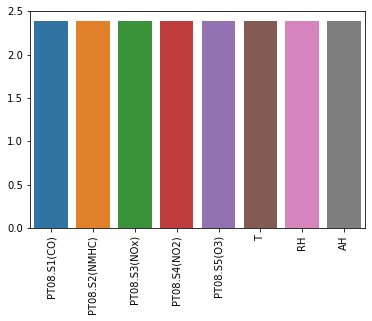

In [68]:
percent_nan = percent_missing(df_drop_label_na)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [75]:
df_drop_label_na.isnull().sum()

Date               0
Time               0
PT08.S1(CO)      184
PT08.S2(NMHC)    184
PT08.S3(NOx)     184
NO2(GT)            0
PT08.S4(NO2)     184
PT08.S5(O3)      184
T                184
RH               184
AH               184
dtype: int64

In [69]:
df_drop_complete=df_drop_label_na.dropna(axis=0,how='any')

df_drop_complete


,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [ ]:
#df_drop_label_na['PT08.S1(CO)'].fillna(df_drop_label_na['PT08.S1(CO)'].mean(),inplace=True)
#df_drop_label_na['PT08.S2(NMHC)'].fillna(df_drop_label_na['PT08.S2(NMHC)'].mean(),inplace=True)
#df_drop_label_na['PT08.S3(NOx)'].fillna(df_drop_label_na['PT08.S3(NOx)'].mean(),inplace=True)
#df_drop_label_na['PT08.S4(NO2)'].fillna(df_drop_label_na['PT08.S4(NO2)'].mean(),inplace=True)
#df_drop_label_na['PT08.S5(O3)'].fillna(df_drop_label_na['PT08.S5(O3)'].mean(),inplace=True)
#df_drop_label_na['T'].fillna(df_drop_label_na['T'].mean(),inplace=True)
#df_drop_label_na['RH'].fillna(df_drop_label_na['RH'].mean(),inplace=True)
#df_drop_label_na['AH'].fillna(df_drop_label_na['AH'].mean(),inplace=True)





In [70]:
df_drop_complete.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
PT08.S2(NMHC)    0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
df_drop_complete

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


### 4- Replace date feature

In [71]:
days=[]
months=[]
years=[]
dates=df_drop_complete['Date']
for d in dates:
  date=d.split('/')
  days.append(date[0])
  months.append(date[1])
  years.append(date[2])
df_cleaned=df_drop_complete.drop(axis=1,columns='Date')
df_cleaned

,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...
9352,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [72]:
df_cleaned.insert(0,'Day',days)
df_cleaned.insert(1,'Month',months)
df_cleaned.insert(2,'Year',years)

In [73]:
df_cleaned

,Day,Month,Year,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,10,2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3,10,2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3,10,2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3,10,2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3,10,2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,4,2005,10:00:00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4,4,2005,11:00:00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4,4,2005,12:00:00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4,4,2005,13:00:00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


### 5- Replace time feature

In [74]:
times=df_cleaned['Time']
hours=[]
minutes=[]
seconds=[]
for t in times:
  time=t.split(':')
  hours.append(time[0])
  minutes.append(time[1])
  seconds.append(time[2])
df_cleaned.drop(axis=1,columns='Time',inplace=True)
df_cleaned

,Day,Month,Year,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,10,2004,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3,10,2004,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3,10,2004,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3,10,2004,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3,10,2004,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,4,2005,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4,4,2005,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4,4,2005,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4,4,2005,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [75]:
df_cleaned.insert(3,'Hour',hours)
df_cleaned.insert(4,'Minute',minutes)
df_cleaned.insert(5,'Seconds',seconds)



In [76]:
df_cleaned

,Day,Month,Year,Hour,Minute,Seconds,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,10,2004,18,00,00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3,10,2004,19,00,00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3,10,2004,20,00,00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3,10,2004,21,00,00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3,10,2004,22,00,00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,4,2005,10,00,00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4,4,2005,11,00,00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4,4,2005,12,00,00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4,4,2005,13,00,00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


### 6- Apply feature scaling

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [78]:
df_cleaned.corr()['NO2(GT)'].sort_values()

PT08.S3(NOx)    -0.648879
AH              -0.340000
T               -0.197428
RH              -0.082745
PT08.S4(NO2)     0.146926
PT08.S2(NMHC)    0.638464
PT08.S1(CO)      0.639845
PT08.S5(O3)      0.706745
NO2(GT)          1.000000
Name: NO2(GT), dtype: float64

In [124]:
RMSE=[]
Alphas=[]
coef=[]
X=df_cleaned.drop(columns=['NO2(GT)','Minute','Seconds'],axis=1)
y=df_cleaned['NO2(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





### 7- Evaluate different degrees of lasso CV polynomial regression

In [80]:
for i in range(1,5):
  polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
  poly_features = polynomial_converter.fit_transform(X_train)
  lasso_cv_model = LassoCV(eps=0.05,n_alphas=100,cv=5)
  lasso_cv_model.fit(poly_features,y_train)
  poly_test = polynomial_converter.fit_transform(X_test)
  test_pred = lasso_cv_model.predict(poly_test)
  Alphas.append(lasso_cv_model.alpha_)
  coef.append(lasso_cv_model.coef_)
  mse= mean_squared_error(y_test,test_pred)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)

### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

In [81]:
print('RMSE:',RMSE)
print('Lambdas:',Alphas)
print('Coefficients:',coef)

RMSE: [23.521912004196395, 21.794283814697213, 24.617114867683032, 31.615361513037147]
Lambdas: [1.7122121094265759, 1.7122121094265754, 5.904663373102993, 14.93763550868471]
Coefficients: [array([  0.        ,   0.        ,   8.26250119,   5.41432309,
         0.        ,   9.00583464, -10.55435738,  -0.        ,
        16.10726958,   0.        ,  -2.06569956, -15.29560696]), array([ 0.00000000e+00,  0.00000000e+00,  6.65011752e+00,  4.92307212e+00,
        0.00000000e+00,  1.48533725e+01, -7.56156285e+00, -0.00000000e+00,
        1.39308864e+01, -0.00000000e+00, -0.00000000e+00, -1.54996786e+01,
        0.00000000e+00,  0.00000000e+00, -1.58651004e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.98591957e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e

In [82]:
RMSE=np.array(RMSE)
mindegree=np.argmin(RMSE)
lasso_min=RMSE[mindegree]
print('best degree is:',mindegree+1,'with rmse',RMSE[mindegree],'lambda equals',Alphas[mindegree])
print('With Coefficients',coef[mindegree])


best degree is: 2 with rmse 21.794283814697213 lambda equals 1.7122121094265754
With Coefficients [ 0.00000000e+00  0.00000000e+00  6.65011752e+00  4.92307212e+00
  0.00000000e+00  1.48533725e+01 -7.56156285e+00 -0.00000000e+00
  1.39308864e+01 -0.00000000e+00 -0.00000000e+00 -1.54996786e+01
  0.00000000e+00  0.00000000e+00 -1.58651004e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.98591957e-03  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.52907039e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.59170269e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000

<AxesSubplot: ylabel='Density'>

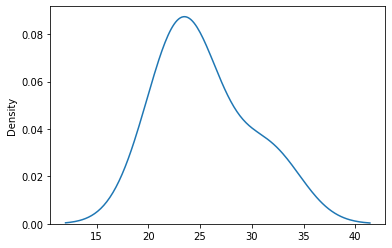

In [83]:
sns.kdeplot(RMSE)

### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [113]:
RMSE=[]
Alphas=[]
coef=[]
MEA=[]





In [114]:
for i in range(1,5):
  polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
  poly_features = polynomial_converter.fit_transform(X_train)
  ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0),scoring='neg_mean_absolute_error')
  ridge_cv_model.fit(poly_features,y_train)
  poly_test = polynomial_converter.fit_transform(X_test)
  test_pred = ridge_cv_model.predict(poly_test)
  Alphas.append(ridge_cv_model.alpha_)
  coef.append(ridge_cv_model.coef_)
  tr_pr=ridge_cv_model.predict(poly_features)
  mse= mean_squared_error(y_test,test_pred)
  mea=mean_absolute_error(y_test,test_pred)
  mse1=mean_squared_error(y_train,tr_pr)
  rmse1=np.sqrt(mse1)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)


[[-5.73476260e-01 -5.75367233e-01 -6.27460782e-01 ...  3.39146909e-01
  -2.49105885e-01  1.82970095e-01]
 [ 2.96726225e-01 -1.37220399e+00 -6.27460782e-01 ...  1.55955385e-02
   1.18447052e-01  8.99597287e-01]
 [ 1.74706370e+00  1.24597392e+00 -6.27460782e-01 ...  4.64136322e-02
  -2.36863038e-02  1.20878493e-02]
 ...
 [-2.83408765e-01  4.49137165e-01 -6.27460782e-01 ...  1.63075524e-04
  -5.61731013e-04  1.93494231e-03]
 [-2.83408765e-01  1.58747538e+00 -6.27460782e-01 ...  4.50195187e-02
   1.26511244e-02  3.55514573e-03]
 [ 1.74706370e+00 -1.37220399e+00 -6.27460782e-01 ...  1.90307037e+00
   5.46725384e-01  1.57066522e-01]]


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

In [98]:
print('RMSE:',RMSE)
print('Lambdas:',Alphas)
print('Coefficients:',coef)

RMSE: [22.771198492470567, 19.265747704811417, 16.798877326271256, 15.19606063059892]
Lambdas: [0.1, 0.1, 1.0, 8.0]
Coefficients: [array([ -2.54386568,   0.35251565,   6.39467884,   5.35048547,
         0.07231077,  26.1827747 ,  -6.92763539, -19.87677122,
        16.78259316,   6.23573483,   0.31863906, -11.10542875]), array([ 7.86308857e+00,  1.82842053e+00,  1.79382571e+00,  4.46466920e+00,
        1.57742474e+01,  3.32073621e+01, -1.84423699e+00, -2.45534995e+01,
        4.77944656e+00,  5.89114704e+01,  3.97453622e+01, -5.52507440e+01,
       -6.20530751e+00, -2.97827636e+00,  2.22345316e+00,  2.48556585e+00,
       -1.28561230e+00,  1.19266836e+01,  5.09891451e+00, -1.29541141e+01,
        5.52261612e+00,  2.18016550e+01,  1.34311699e+01, -9.46639047e+00,
       -6.63599892e-01,  5.58830652e-01,  1.96176957e-02, -3.30938942e+00,
        1.00050346e+01,  3.33260582e+00, -6.67736043e+00,  1.53040104e+00,
        1.73266122e+00,  2.76664085e+00,  3.00583006e+00,  1.73330978e+00,
   

In [99]:
RMSE=np.array(RMSE)
mindegree=np.argmin(RMSE)
ridge_min=RMSE[mindegree]
print('best degree is:',mindegree+1,'with rmse',RMSE[mindegree],'lambda equals',Alphas[mindegree])
print('With Coefficients',coef[mindegree])

best degree is: 4 with rmse 15.19606063059892 lambda equals 8.0
With Coefficients [ 5.82689723 -2.03904764  0.54262245 ...  0.95202959  4.70024886
 -2.51969397]


<AxesSubplot: ylabel='Density'>

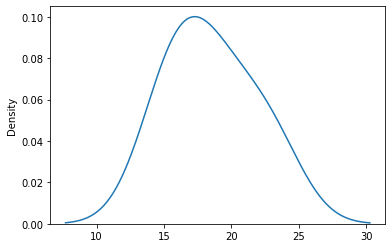

In [100]:
sns.kdeplot(RMSE)

### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [101]:
RMSE=[]
Alphas=[]
coef=[]
MEA=[]
l1=[]

In [102]:
from sklearn.linear_model import ElasticNetCV

for i in range(1,5):
  polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
  poly_features = polynomial_converter.fit_transform(X_train)
  elastic_model = ElasticNetCV(l1_ratio=[.1,.25, .5,.75, 1], tol=0.01)
  elastic_model.fit(poly_features,y_train)
  poly_test = polynomial_converter.fit_transform(X_test)
  test_pred = elastic_model.predict(poly_test)
  Alphas.append(elastic_model.alpha_)
  coef.append(elastic_model.coef_)
  mse= mean_squared_error(y_test,test_pred)
  mea=mean_absolute_error(y_test,test_pred)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

In [103]:
print('RMSE:',RMSE)
print('Lambdas:',Alphas)
print('Coefficients:',coef)


RMSE: [22.78487344471668, 19.534392127739256, 18.053469546796183, 17.76941513197033]
Lambdas: [0.034244242188531525, 0.03424424218853151, 0.11809326746205985, 0.29875271017369426]
Coefficients: [array([-1.76527426e+00,  3.66687669e-01,  7.14385415e+00,  5.41580526e+00,
        5.48091122e-03,  2.46730625e+01, -7.11613959e+00, -1.78636944e+01,
        1.68175762e+01,  5.32985641e+00, -3.15030019e-01, -1.13599571e+01]), array([ 8.21102518e+00,  1.89242494e+00,  3.93025059e+00,  4.49953392e+00,
        1.48318557e+01,  2.63175449e+01, -4.19711127e+00, -1.33512501e+01,
        3.20013396e+00,  0.00000000e+00, -3.21698326e-01, -1.53885978e+01,
       -4.00505346e+00, -2.18309325e+00,  2.11987673e-02,  1.46852132e+00,
        1.03415410e+00,  3.95431415e+00,  9.37775257e-01,  0.00000000e+00,
       -0.00000000e+00,  1.16250179e+00, -4.79830077e-02, -3.54079770e+00,
       -2.88289834e-01,  1.17333650e+00,  0.00000000e+00, -2.84355449e+00,
        6.25031857e+00,  2.33039195e+00, -2.63941588e

In [104]:
RMSE=np.array(RMSE)
mindegree=np.argmin(RMSE)
elastic_min=RMSE[mindegree]

print('best degree is:',mindegree+1,'with rmse',RMSE[mindegree],'lambda equals',Alphas[mindegree])
print('With Coefficients',coef[mindegree])

best degree is: 4 with rmse 17.76941513197033 lambda equals 0.29875271017369426
With Coefficients [ 1.17974928 -0.          0.         ...  0.          0.15707691
  0.        ]


<AxesSubplot: ylabel='Density'>

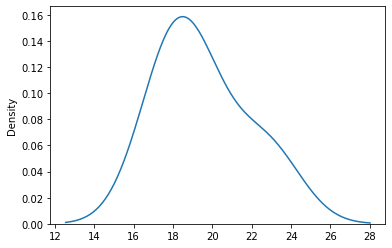

In [105]:
sns.kdeplot(RMSE)

### 11- Compare the errors from the 3 regularization techniques, and save the best model.

In [106]:
if elastic_min<ridge_min:
  if elastic_min<lasso_min:
    print('Minimum error is elastic=',elastic_min)
  else:
    print('Minimum error is lasso=',lasso_min)
else:
  if ridge_min<lasso_min:
    print('Minimum error is ridge=',ridge_min)
  else:
    print('Minimum error is lasso=',lasso_min)




Minimum error is ridge= 15.19606063059892


In [107]:
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_model=RidgeCV(alphas=(0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0),scoring='neg_mean_absolute_error')
final_model.fit(final_poly_converter.fit_transform(X_train),y_train)

RidgeCV(alphas=(0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0),
        scoring='neg_mean_absolute_error')

### 12- Load the best model and test it on a sample that you manually created it.

In [108]:
from joblib import dump, load
dump(final_model, 'air_quality_model.joblib')
dump(final_poly_converter,'poly_converter.joblib')
dump(scaler,'scaler.joblib')

['scaler.joblib']

In [115]:
df_cleaned

,Day,Month,Year,Hour,Minute,Seconds,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,10,2004,18,00,00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3,10,2004,19,00,00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3,10,2004,20,00,00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3,10,2004,21,00,00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3,10,2004,22,00,00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,4,2005,10,00,00,1314.0,1101.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,4,4,2005,11,00,00,1163.0,1027.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,4,4,2005,12,00,00,1142.0,1063.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,4,4,2005,13,00,00,1003.0,961.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [118]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('air_quality_model.joblib')
loaded_scaler=load('scaler.joblib')

In [123]:
data={'Day':[3,8],'Month':[11,12],'Year':[2004,2004],'Hour':[1,19],'PT08.S1(CO)':[1136.0,1140.0],'PT08.S2(NMHC)':[672.0,562.0],'PT08.S3(NOx)':[1462.0,1230.0],'PT08.S4(NO2)':[1333.0,1230.0],'PT08.S5(O3)':[730.0,655.0],'T':[10.7,20.1],'RH':[59.7,62.5],'AH':[0.7702,0.73412]}
dt=pd.DataFrame(data)
x=loaded_scaler.transform(dt)
#df=pd.DataFrame(df)
pol=loaded_poly.transform(x)
loaded_model.predict(pol)


array([77.96513646, 82.70446923])

## Great work!
----